# Facebook Prophet

Needs to be trained

In [1]:
import pandas as pd
from prophet import Prophet
from datetime import datetime, timedelta
import yfinance as yf
from prophet.plot import plot_plotly, plot_components_plotly
import matplotlib.pyplot as plt

## Data download and preparation

Input data has to be a pandas dataframe such that the timestamp is a column named "ds" and the actual time-series data is a column named "y".

In [2]:
prediction_length = 10
now = datetime.today()
end_date = now - timedelta(days = prediction_length)
start_date = end_date - timedelta(days=365)  
apple_stock_price = yf.download("AAPL", start=start_date, end=end_date, interval="1d")["Adj Close"]
apple_stock_price_eval = yf.download("AAPL", start=end_date, end=now, interval="1d")["Adj Close"]

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [3]:
apple_stock_price_eval

Date
2024-06-04    194.350006
2024-06-05    195.869995
2024-06-06    194.479996
2024-06-07    196.889999
2024-06-10    193.119995
2024-06-11    207.149994
2024-06-12    213.070007
2024-06-13    214.240005
Name: Adj Close, dtype: float64

In [4]:
apple_stock_price = apple_stock_price.reset_index()
apple_stock_price.columns = ['ds', 'y']

apple_stock_price_eval = apple_stock_price_eval.reset_index()
apple_stock_price_eval.columns = ['ds', 'y']

In [5]:
apple_stock_price.tail()

,ds,y
246,2024-05-28,189.990005
247,2024-05-29,190.289993
248,2024-05-30,191.289993
249,2024-05-31,192.250000
250,2024-06-03,194.029999


## Predicting future

In [6]:
m = Prophet()
m.fit(apple_stock_price)

22:10:53 - cmdstanpy - INFO - Chain [1] start processing
22:10:53 - cmdstanpy - INFO - Chain [1] done processing


In [7]:
future = m.make_future_dataframe(periods=prediction_length)
future.tail()

,ds
256,2024-06-09
257,2024-06-10
258,2024-06-11
259,2024-06-12
260,2024-06-13


In [8]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
256,2024-06-09,184.905894,178.707950,191.131634
257,2024-06-10,188.599993,181.861149,194.670964
258,2024-06-11,188.678253,182.208221,195.089128
259,2024-06-12,188.796048,182.587965,195.068916
260,2024-06-13,188.999873,183.085290,195.481623


In [9]:
prophet_prediction = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(prediction_length)

In [10]:
prophet_prediction

,ds,yhat,yhat_lower,yhat_upper
251,2024-06-04,187.146674,181.034180,193.466918
252,2024-06-05,187.264469,181.141616,193.048662
253,2024-06-06,187.468294,181.367125,193.376062
254,2024-06-07,188.027985,181.678106,193.796184
255,2024-06-08,184.687098,178.480391,191.074504
256,2024-06-09,184.905894,178.707950,191.131634
257,2024-06-10,188.599993,181.861149,194.670964
258,2024-06-11,188.678253,182.208221,195.089128
259,2024-06-12,188.796048,182.587965,195.068916
260,2024-06-13,188.999873,183.085290,195.481623


## Plotting predictions

C:\Users\topco\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\topco\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


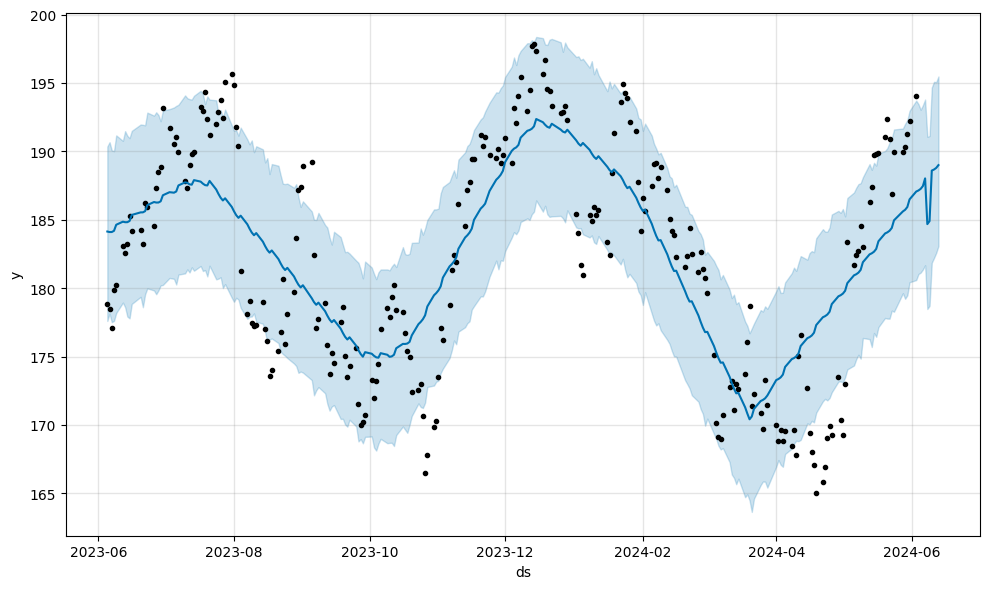

In [11]:
fig1 = m.plot(forecast)

C:\Users\topco\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()


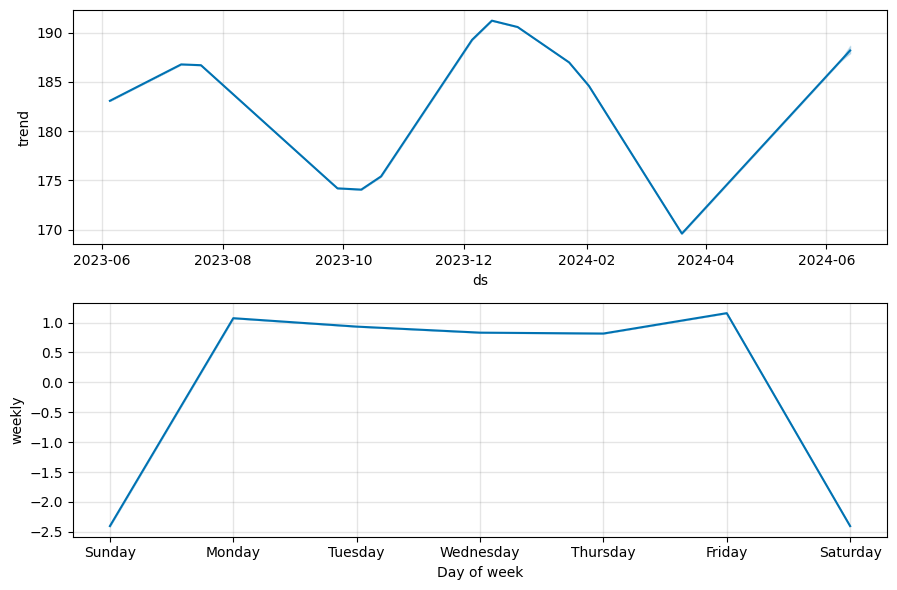

In [12]:
fig2 = m.plot_components(forecast)

In [13]:
plot_plotly(m, forecast)

In [14]:
plot_components_plotly(m, forecast)

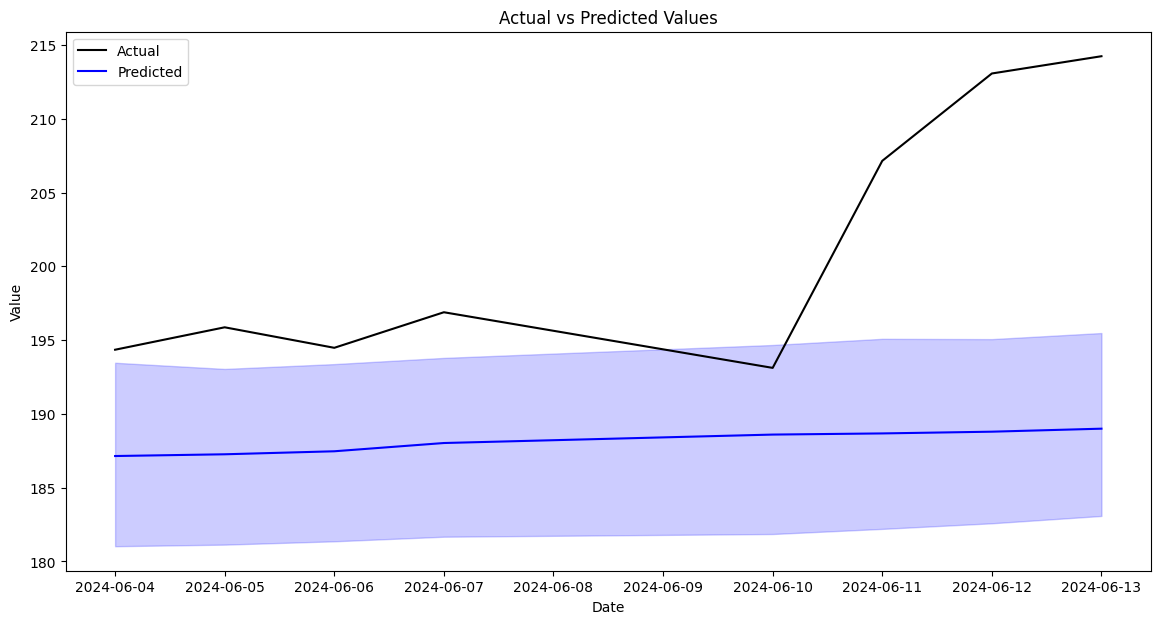

In [15]:
merged_df = pd.merge(apple_stock_price_eval, prophet_prediction, on='ds')

# Plotting
plt.figure(figsize=(14, 7))

# Plot actual values
plt.plot(merged_df['ds'], merged_df['y'], label='Actual', color='black')

# Plot predicted values
plt.plot(merged_df['ds'], merged_df['yhat'], label='Predicted', color='blue')

# Plot confidence interval
plt.fill_between(merged_df['ds'], merged_df['yhat_lower'], merged_df['yhat_upper'], color='blue', alpha=0.2)

plt.title('Actual vs Predicted Values')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

plt.show()